In [7]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf


In [87]:
sp500=yf.Ticker('^GSPC')
ge=yf.Ticker('GE')
# sp500=web.DataReader('^GSPC', 'yahoo', start='1970-01-01')
# ge=web.DataReader('GE', 'yahoo',start='1970-01-01')
sp500_data = yf.download('^GSPC', start='1970-01-01', end='2024-04-26')
ge_data = yf.download('GE', start='1970-01-01', end='2024-04-26')
sp500 = sp500_data['Adj Close']
ge = ge_data['Adj Close']
sp500=sp500.loc[datetime(1970,1,1):]
ge=ge.loc[datetime(1970,1,1):]
monthly_sp500=sp500.resample('M').last()
monthly_ge=ge.resample('M').last()
annualy_sp500=sp500.resample('A').last()
annualy_ge=ge.resample('A').last()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


#### 1

In [88]:
sp500=np.log(sp500/sp500.shift(1))
ge=np.log(ge/ge.shift(1))
monthly_sp500=np.log(monthly_sp500/monthly_sp500.shift(1))
monthly_ge=np.log(monthly_ge/monthly_ge.shift(1))
annualy_sp500=np.log(annualy_sp500/annualy_sp500.shift(1))
annualy_ge=np.log(annualy_ge/annualy_ge.shift(1))

### (a)

In [40]:
# figures, axes=plt.subplots(2,2)
# fig, axes = plt.subplots(2, 2, figsize=(12, 8))
print(acf(sp500.dropna(), nlags=5))
print(acf(monthly_sp500.dropna(), nlags=5))
print(acf(annualy_sp500.dropna(), nlags=5))
print(acf(ge.dropna(), nlags=5))
print(acf(monthly_ge.dropna(), nlags=5))
print(acf(annualy_ge.dropna(), nlags=5))



[ 1.         -0.01739987 -0.01435179 -0.00373228 -0.02443656 -0.00482602]
[ 1.          0.02203074 -0.05086682  0.03398881  0.01038939  0.06154224]
[ 1.         -0.06449594 -0.14680203  0.02763828  0.08765153 -0.29266323]
[ 1.00000000e+00  3.72067790e-03 -1.13780345e-02 -1.06739407e-02
  7.33909885e-04 -1.91572277e-02]
[1.         0.07042057 0.00602954 0.02749102 0.07141762 0.04999932]
[ 1.          0.13340606 -0.0772933   0.00458044  0.09139416 -0.24777579]


### (b)

In [41]:
print('i')
print('annualized daily volatility of S&P 500:', sp500.std()*np.sqrt(252))
print('annualized daily volatility of GE:', ge.std()*np.sqrt(252))
print('ii')
print('annualized monthly volatility of S&P 500:', monthly_sp500.std()*np.sqrt(12))
print('annualized monthly volatility of GE:', monthly_ge.std()*np.sqrt(12))
print('iii')
print('annualized annual volatility of S&P 500:', annualy_sp500.std())
print('annualized annual volatility of GE:', annualy_ge.std())

i
annualized daily volatility of S&P 500: 0.17260310676400414
annualized daily volatility of GE: 0.28401336815604855
ii
annualized monthly volatility of S&P 500: 0.15440699979393419
annualized monthly volatility of GE: 0.26477109268580584
iii
annualized annual volatility of S&P 500: 0.16747816642248872
annualized annual volatility of GE: 0.30307885224080156


The estimation of std is aggregated from different frequencies, so they are different.

In [89]:
sp500=sp500.dropna()
ge=ge.dropna()
monthly_sp500=monthly_sp500.dropna()
monthly_ge=monthly_ge.dropna()
annualy_sp500=annualy_sp500.dropna()
annualy_ge=annualy_ge.dropna()

### (c)

In [90]:
sp500_monthly_vol=sp500.resample('M').std()*np.sqrt(22)
ge_monthly_vol=ge.resample('M').std()*np.sqrt(22)
agg_sp500_monthly_vol=monthly_sp500.abs()
agg_ge_monthly_vol=monthly_ge.abs()


In [54]:
def calc_3(df,input):
    print(f'mean of {input}:', df.mean())
    print(f'std of{input}:', df.std())
calc_3(sp500_monthly_vol.dropna(),'S&P 500 monthly volatility')
calc_3(agg_sp500_monthly_vol,'S&P 500 monthly volatility based on daily data')
print('corr between monthly volatility and monthly volatility based on daily data of S&P 500:')
print(np.corrcoef(sp500_monthly_vol.iloc[1:],agg_sp500_monthly_vol)[0,1])
calc_3(ge_monthly_vol,'GE monthly volatility')
calc_3(agg_ge_monthly_vol,'GE monthly volatility based on daily data')
print('corr between monthly volatility and monthly volatility based on daily data of GE:')
print(np.corrcoef(ge_monthly_vol.iloc[1:],agg_ge_monthly_vol)[0,1])


mean of S&P 500 monthly volatility: 0.04375896616149883
std ofS&P 500 monthly volatility: 0.026421220264375198
mean of S&P 500 monthly volatility based on daily data: 0.03440222540353735
std ofS&P 500 monthly volatility based on daily data: 0.02899784301199056
corr between monthly volatility and monthly volatility based on daily data of S&P 500:
0.5126262543579002
mean of GE monthly volatility: 0.0737098543042134
std ofGE monthly volatility: 0.04077167583659131
mean of GE monthly volatility based on daily data: 0.0561879475437433
std ofGE monthly volatility based on daily data: 0.05252718214083
corr between monthly volatility and monthly volatility based on daily data of GE:
0.5095934806149054


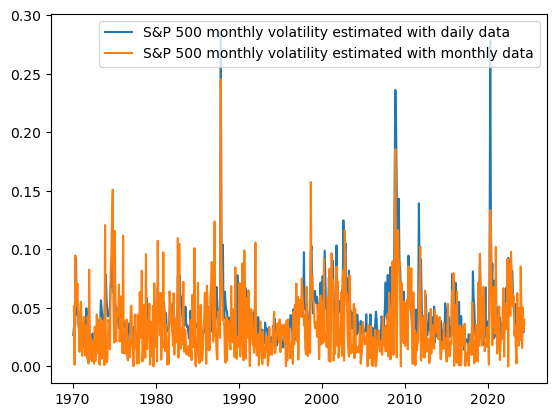

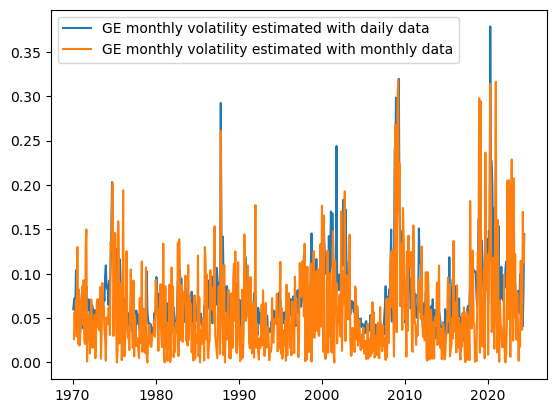

In [76]:
plt.plot(sp500_monthly_vol,label='S&P 500 monthly volatility estimated with daily data')
plt.plot(agg_sp500_monthly_vol,label='S&P 500 monthly volatility estimated with monthly data')
plt.legend()
plt.show()
plt.plot(ge_monthly_vol,label='GE monthly volatility estimated with daily data')
plt.plot(agg_ge_monthly_vol,label='GE monthly volatility estimated with monthly data')
plt.legend()
plt.show()

### (d)(e)(f)

1.We can oberseve obvious lag of prediction compared with the true vol. 2. The prediction value is far more stable and it hardly matches the extreme values.

In [91]:
realized_sp500_monthly_vol=(sp500.resample('M')).agg(lambda x: (x**2).sum())
realized_ge_monthly_vol=(ge.resample('M')).agg(lambda x: (x**2).sum())
realized_ge_monthly_vol.name=None
realized_sp500_monthly_vol.name=None

d:\python3.11\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:              logreturn   No. Observations:                  652
Model:                 ARIMA(1, 0, 0)   Log Likelihood                2512.464
Date:                Mon, 29 Apr 2024   AIC                          -5018.928
Time:                        05:44:25   BIC                          -5005.488
Sample:                    01-31-1970   HQIC                         -5013.716
                         - 04-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0025      0.001      2.656      0.008       0.001       0.004
ar.L1          0.3601      0.015     24.776      0.000       0.332       0.389
sigma2      2.629e-05   4.51e-07     58.251      0.0

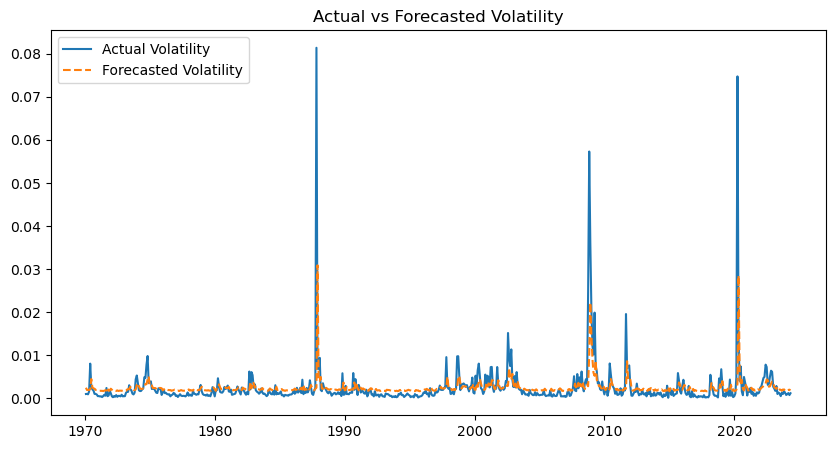

MSE: 2.632424487311854e-05


In [75]:
from statsmodels.tsa.arima.model import ARIMA
def pipeline4(data):
    data=pd.DataFrame(data,columns=['logreturn'])
    # print(data)
    model = ARIMA(data['logreturn'], order=(1,0,0))
    model_fitted = model.fit(method_kwargs={'maxiter':0})
    print(model_fitted.summary() )
    data['forecast'] = model_fitted.fittedvalues

    mse = np.mean(np.square(data['logreturn'] - data['forecast']))
    plt.figure(figsize=(10,5))
    plt.plot(data['logreturn'], label='Actual Volatility')
    plt.plot(data['forecast'], label='Forecasted Volatility', linestyle='--')
    plt.legend()
    plt.title('Actual vs Forecasted Volatility')
    plt.show()
    print('MSE:', mse)
pipeline4(monthly_sp500)

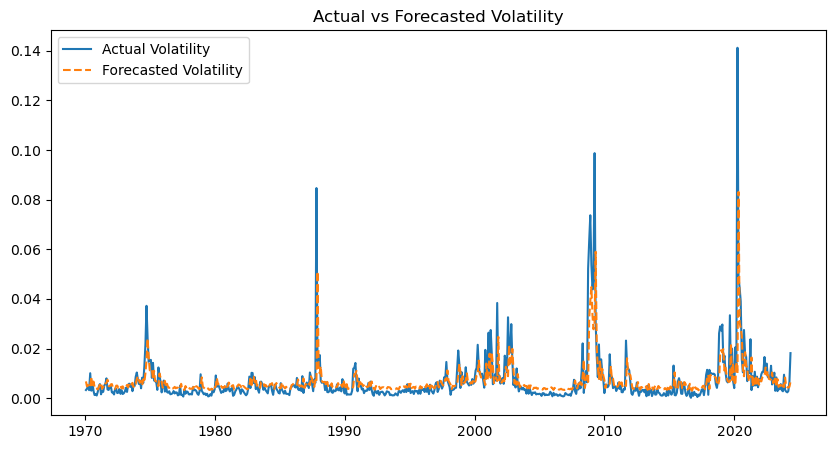

MSE: 7.540145106220236e-05


In [109]:
pipeline4(realized_ge_monthly_vol)

In [93]:
monthly_sp500.name=None
monthly_ge.name=None
monthly_sp500=pd.DataFrame(monthly_sp500,columns=['logreturn'])
monthly_sp500['realized_vol']=realized_sp500_monthly_vol.iloc[1:]
monthly_ge=pd.DataFrame(monthly_ge,columns=['logreturn'])
monthly_ge['realized_vol']=realized_ge_monthly_vol.iloc[1:]

## 2

### (a) (b) (c)

1.The model still cannot capture the extreme values 2.RMSE is even smaller than AR model.

Iteration:      5,   Func. Count:     39,   Neg. LLF: -1080.248034319472
Iteration:     10,   Func. Count:     73,   Neg. LLF: -1126.1507130775826
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1127.0120365819423
            Iterations: 15
            Function evaluations: 96
            Gradient evaluations: 14
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              logreturn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1127.01
Distribution:                  Normal   AIC:                          -2246.02
Method:            Maximum Likelihood   BIC:                          -2228.11
                                        No. Observations:                  651
Date:                Mon, Apr 29 2024   Df Residuals:                      650
Time:     

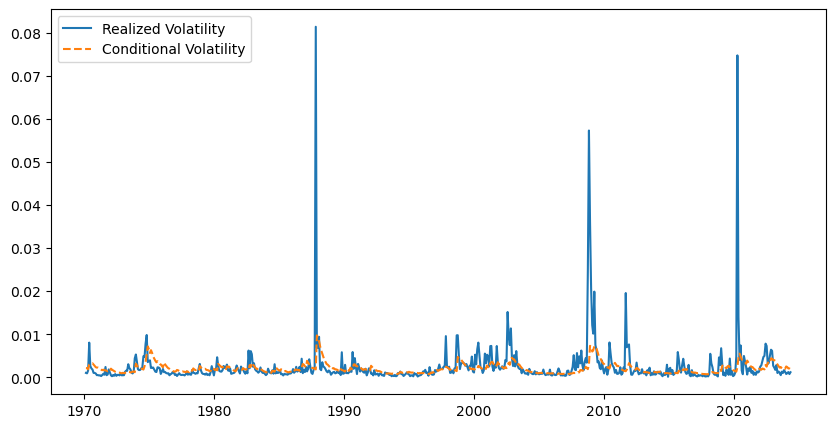

GARCH RMSE: 0.005324049687354842


In [97]:
from arch import arch_model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def garch_1_1(data):
    garch_model = arch_model(data['logreturn'], mean='constant',vol='Garch', p=1, q=1,rescale=False)
    garch_result = garch_model.fit(update_freq=5)

    # Print out the summary of the GARCH model to see the parameters.
    print(garch_result.summary())

    # Use the model to estimate the conditional volatility.
    data['conditional_volatility'] = (garch_result.conditional_volatility)**2

    # Plot the realized volatility against the conditional volatility.
    plt.figure(figsize=(10,5))
    plt.plot(data.index, data['realized_vol'], label='Realized Volatility')
    plt.plot(data.index, data['conditional_volatility'], label='Conditional Volatility', linestyle='--')
    plt.legend()
    plt.show()

    # Calculate the RMSE for the GARCH model forecasts.
    garch_rmse = np.sqrt(np.mean(np.square(data['realized_vol'] - data['conditional_volatility'])))
    print('GARCH RMSE:', garch_rmse)
garch_1_1(monthly_sp500)


Iteration:      5,   Func. Count:     41,   Neg. LLF: -804.2317617084133
Optimization terminated successfully    (Exit mode 0)
            Current function value: -807.5626506308424
            Iterations: 9
            Function evaluations: 62
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              logreturn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                807.563
Distribution:                  Normal   AIC:                          -1607.13
Method:            Maximum Likelihood   BIC:                          -1589.21
                                        No. Observations:                  651
Date:                Mon, Apr 29 2024   Df Residuals:                      650
Time:                        08:00:41   Df Model:                            1
        

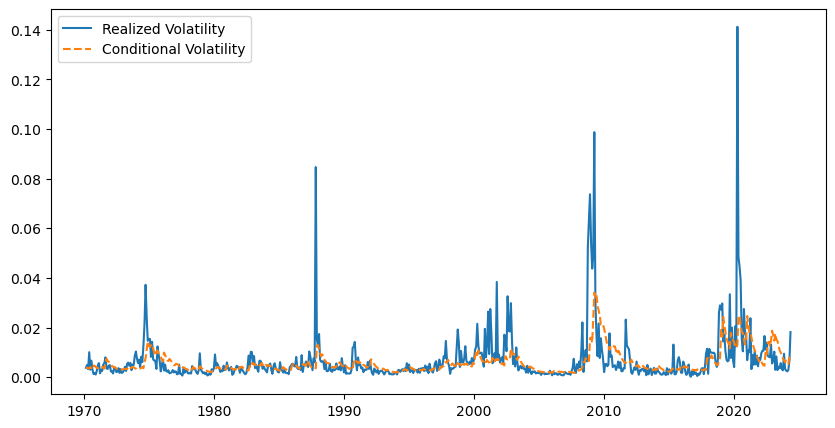

GARCH RMSE: 0.00932549926284115


In [98]:
garch_1_1(monthly_ge)

### (d)

In [99]:
def select_best_garch_p_q(data):
    # data=pd.DataFrame(data,columns=['logreturn'])
    best_aic = np.inf
    best_order = None
    for p in range(1, 6):
        for q in range(1, 6):
            try:
                garch_model = arch_model(data['logreturn'], vol='Garch', p=p, q=q,rescale=False)
                garch_result = garch_model.fit(disp='off')
                aic = garch_result.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, q)
            except:
                pass
    print('Best AIC:', best_aic)
    print('Best Order:', best_order)
select_best_garch_p_q(monthly_sp500)

Best AIC: -2247.9254802810074
Best Order: (3, 3)


In [100]:
select_best_garch_p_q(monthly_ge)

Best AIC: -1608.69402503601
Best Order: (2, 2)
